# Gradient Descent
gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

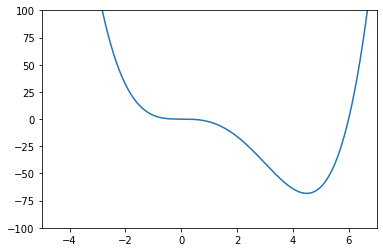

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3 
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x));

In [2]:
def f_(x):
    return 2*x**3 - 9*x**2

x = 0
x_0 = -4
gamma = 0.04
delta = 0.00001

while abs(x_0 - x) > delta:
    x = x_0
    x_0 = x - gamma * f_(x)
    
print("최저점 : (", str(x_0),',',str(f(x_0)),')')    

최저점 : ( 4.5000033698967385 , -68.34374999977004 )


# Diabetes (regression)
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.


1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
diabetes=datasets.load_diabetes()

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [6]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [7]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

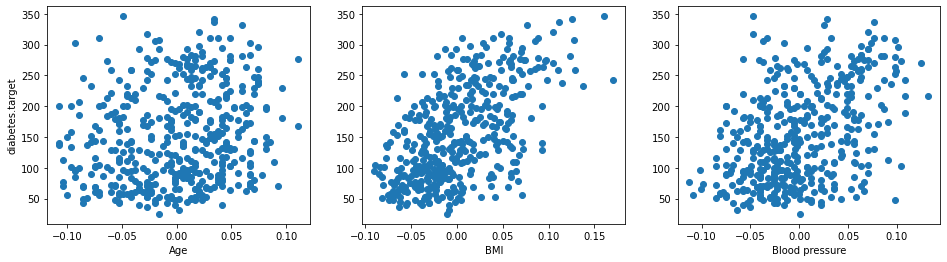

In [8]:
plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.scatter(diabetes.data[:,0],diabetes.target)
plt.xlabel('Age')
plt.ylabel('diabetes.target')

plt.subplot(132)
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('BMI')

plt.subplot(133)
plt.scatter(diabetes.data[:,3],diabetes.target)
plt.xlabel('Blood pressure')
plt.show()

1. sklearn을 이용하지 않고 (자신의 코드로)

In [9]:
def y_hat(a,b,x):
    return a*x+b

def E(a,b,x):
    return np.mean((y_hat(a,b,x) - Y)**2)

In [10]:
E(5,5,X_age)

27571.32164989755

Age : (기울기, 절편) = ( 304.20000000000067 152.09999999999565 )
BMI : (기울기, 절편) = ( 949.4000000001473 152.09999999999565 )
Blood pressure : (기울기, 절편) = ( 714.700000000094 152.09999999999565 )


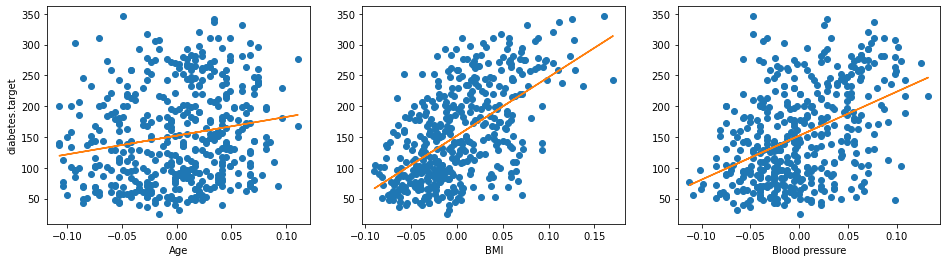

In [11]:
n = 100000
dx = 0.1
a,b,x = 5,5,X_age
for i in range(n):
    if E(a+dx,b,x) < E(a,b,x):
        a = a+dx
    elif E(a-dx,b,x) < E(a,b,x):
        a = a-dx
    elif E(a,b+dx,x) < E(a,b,x):
        b = b+dx
    elif E(a,b-dx,x) < E(a,b,x):
        b = b-dx
    else:
        a,b = a,b
print('Age : (기울기, 절편) = (', a, b,')')

plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.plot(X_age,Y,"o")
plt.plot(X_age,y_hat(a, b, X_age))
plt.xlabel('Age')
plt.ylabel('diabetes.target')

n = 100000
dx = 0.1
a,b,x = 5,5,X_bmi
for i in range(n):
    if E(a+dx,b,x) < E(a,b,x):
        a = a+dx
    elif E(a-dx,b,x) < E(a,b,x):
        a = a-dx
    elif E(a,b+dx,x) < E(a,b,x):
        b = b+dx
    elif E(a,b-dx,x) < E(a,b,x):
        b = b-dx
    else:
        a,b = a,b
print('BMI : (기울기, 절편) = (', a, b,')')

plt.subplot(132)
plt.plot(x,Y,"o")
plt.plot(x,y_hat(a, b, x))
plt.xlabel('BMI')

n = 100000
dx = 0.1
a,b,x = 5,5,X_p
for i in range(n):
    if E(a+dx,b,x) < E(a,b,x):
        a = a+dx
    elif E(a-dx,b,x) < E(a,b,x):
        a = a-dx
    elif E(a,b+dx,x) < E(a,b,x):
        b = b+dx
    elif E(a,b-dx,x) < E(a,b,x):
        b = b-dx
    else:
        a,b = a,b
print('Blood pressure : (기울기, 절편) = (', a, b,')')

plt.subplot(133)
plt.plot(x,Y,"o")
plt.plot(x,y_hat(a, b, x))
plt.xlabel('Blood pressure');

2. sklearn을 이용해서

Age : (기울기, 절편) = ( 304.1830745282948 152.13348416289605 )
나이가 당뇨병을 3.5 % 를 설명할 수 있다.
BMI : (기울기, 절편) = ( 949.4352603839491 152.1334841628967 )
BMI가 당뇨병을 34.4 % 를 설명할 수 있다.
Blood pressure : (기울기, 절편) = ( 714.7416437042881 152.13348416289585 )
혈압이 당뇨병을 19.5 % 를 설명할 수 있다.


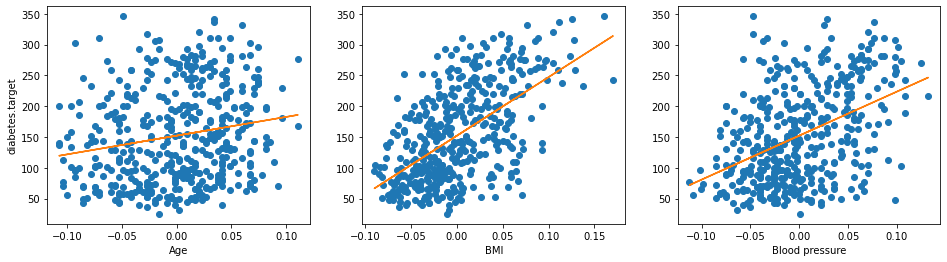

In [12]:
X_age=np.array(diabetes.data[:,0]) 
X_bmi=np.array(diabetes.data[:,2])
X_p=np.array(diabetes.data[:,3])
Y=diabetes.target

X_age=np.array([[i] for i in X_age])
X_bmi=np.array([[i] for i in X_bmi])
X_p=np.array([[i] for i in X_p])
Y=np.array([[i] for i in Y])

f=LinearRegression()
f.fit(X_age,Y)

print('Age : (기울기, 절편) = (', float(f.coef_), float(f.intercept_),')')

print('나이가 당뇨병을',round(f.score(X_age, Y)*100,1),'% 를 설명할 수 있다.')

plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.plot(X_age,Y,"o")
plt.plot(X_age,f.predict(X_age))
plt.xlabel('Age')
plt.ylabel('diabetes.target')

f=LinearRegression()
f.fit(X_bmi,Y)

print('BMI : (기울기, 절편) = (', float(f.coef_), float(f.intercept_),')')

print('BMI가 당뇨병을',round(f.score(X_bmi, Y)*100,1),'% 를 설명할 수 있다.')

plt.subplot(132)
plt.plot(X_bmi,Y,"o")
plt.plot(X_bmi,f.predict(X_bmi))
plt.xlabel('BMI')

f=LinearRegression()
f.fit(X_p,Y)

print('Blood pressure : (기울기, 절편) = (', float(f.coef_), float(f.intercept_),')')

print('혈압이 당뇨병을',round(f.score(X_p, Y)*100,1),'% 를 설명할 수 있다.')

plt.subplot(133)
plt.plot(X_p,Y,"o")
plt.plot(X_p,f.predict(X_p))
plt.xlabel('Blood pressure');


In [13]:
import pandas as pd

X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

df = pd.DataFrame(
    [
    ], 
    
)
df.insert(0,"Age",X_age,True)
df.insert(1,"BMI",X_bmi,True)
df.insert(2,"Blood pressure",X_p,True)
df.insert(3,"Diabetes",Y,True)
df

,Age,BMI,Blood pressure,Diabetes
0,0.038076,0.061696,0.021872,151.0
1,-0.001882,-0.051474,-0.026328,75.0
2,0.085299,0.044451,-0.005671,141.0
3,-0.089063,-0.011595,-0.036656,206.0
4,0.005383,-0.036385,0.021872,135.0
...,...,...,...,...
437,0.041708,0.019662,0.059744,178.0
438,-0.005515,-0.015906,-0.067642,104.0
439,0.041708,-0.015906,0.017282,132.0
440,-0.045472,0.039062,0.001215,220.0


In [14]:
from sklearn.model_selection import train_test_split

x = df[['Age','BMI','Blood pressure']]
y = df[['Diabetes']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

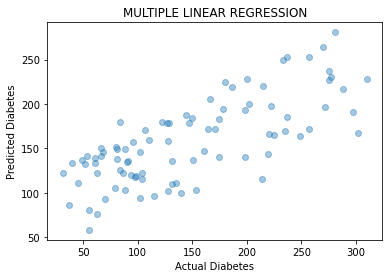

In [16]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [17]:
print(mlr.coef_, mlr.intercept_)
print('나이, BMI, 혈압의 3개의 데이터 셋을 통해 당뇨병의',round(mlr.score(x_train, y_train)*100,1),'를 설명할 수 있다.')

[[ 17.83084519 747.74583016 400.24427665]] [154.26414634]
나이, BMI, 혈압의 3개의 데이터 셋을 통해 당뇨병의 36.7 를 설명할 수 있다.
